In [ ]:
#import modules

import pandas as pd
import numpy as np

#scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


from nltk.corpus import stopwords
import spacy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns




In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
#set random seed
np.random.seed(42)

In [ ]:
#load datasets
#cleaned_gender_df = pd.read_csv('cleaned_gender_df.csv')
#cleaned_nationality_df = pd.read_csv('cleaned_nationality_df.csv')


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
cleaned_gender_df[cleaned_gender_df['author_ID'].str.contains('t2_4jnzekzd', case=False, na=False)]

,author_ID,post,female,cleaned_post
44779,t2_4jnzekzd,What happens to bi people? Actually every line...,0,happen bi people actually line kid name potato...
44780,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44781,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44782,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44783,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44784,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44785,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44786,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44787,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44788,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...


In [ ]:
cleaned_gender_df = cleaned_gender_df[cleaned_gender_df['author_ID'] != 't2_4jnzekzd']

In [ ]:
cleaned_gender_df[cleaned_gender_df['author_ID'] == 't2_8ecqs5dt']

,author_ID,post,female,cleaned_post
3572,t2_8ecqs5dt,Hip slots were one of the first things I disco...,0,hip slot thing discover play game blame people...
3573,t2_8ecqs5dt,new dog figglebottom I was on a train and I op...,0,new dog figglebottom train open start furiousl...
3574,t2_8ecqs5dt,idk One piece fans when they see an anime that...,0,idk piece fan anime sexualize woman 2 second p...
3575,t2_8ecqs5dt,lefts agenda. A creative decision is not alway...,0,lefts agenda creative decision good decision g...
3576,t2_8ecqs5dt,"is Heisenbones is getting funnier, it’s other ...",0,heisenbone get funny variation l4d2 dev commen...
3577,t2_8ecqs5dt,"of LGBT, making flags and doing pride parades ...",0,lgbt make flag pride parade will normalize xen...
3578,t2_8ecqs5dt,I like pyro combos that aren’t completely stup...,0,like pyro combo completely stupid nostalgia ra...
3579,t2_8ecqs5dt,cum cum cum cum cum cum cum cum cum cum cum cu...,0,cum cum cum cum cum cum cum cum cum cum cum cu...
3580,t2_8ecqs5dt,a good fucking warpaint Idk if this person sho...,0,good fucking warpaint idk person reddit lmfao ...
3581,t2_8ecqs5dt,"2 He likes fish sticks Pebblethrow, also he’s ...",0,2 like fish stick pebblethrow nazi imposter so...


In [ ]:
cleaned_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89215 entries, 0 to 89271
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author_ID     89215 non-null  object
 1   post          89215 non-null  object
 2   female        89215 non-null  int64 
 3   cleaned_post  89215 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [ ]:
filtered_nationality_df.describe()

,author_ID,post,nationality,cleaned_post
count,165089,165089,165089,165089
unique,7426,165050,60,165049
top,t2_dj2ua,cunt cunt cunt Cunt cunt cunt cunt cunt Cunt c...,Germany,cunt cunt cunt cunt cunt cunt cunt cunt cunt c...
freq,1031,16,21313,16


In [ ]:
import re

def contains_multiple_occurrences(text, word, min_count=2):
    count = len(re.findall(word, text, re.IGNORECASE))
    return count >= min_count

# Test the function
print(contains_multiple_occurrences("This is a test with cum and cum again", "cum"))


True


In [ ]:
cleaned_nationality_filtered = pd.read_csv('cleaned_nationality_filtered.csv')

In [ ]:
cleaned_gender_filtered = pd.read_csv('cleaned_gender_filtered.csv')

In [ ]:
cleaned_nationality_filtered.to_csv('cleaned_nationality_filtered.csv', index=False)


In [ ]:
cleaned_gender_filtered = cleaned_gender_df[~cleaned_gender_df['cleaned_post'].apply(lambda x: contains_multiple_occurrences(x, 'cum') or contains_multiple_occurrences(x, 'cunt') or contains_multiple_occurrences(x, 'cock'))]


In [ ]:
cleaned_gender_filtered.to_csv('cleaned_gender_filtered.csv', index=False)

In [ ]:

cleaned_gender_df.isnull().sum()

author_ID       0
post            0
female          0
cleaned_post    0
dtype: int64

In [ ]:
#load datasets
cleaned_gender_filtered = pd.read_csv('cleaned_gender_filtered.csv')
cleaned_nationality_filtered = pd.read_csv('cleaned_nationality_filtered.csv')

In [ ]:
cleaned_nationality_filtered = cleaned_nationality_df[~cleaned_nationality_df['cleaned_post'].apply(lambda x: contains_multiple_occurrences(x, 'cock'))]


In [ ]:
cleaned_nationality_filtered = pd.read_csv('cleaned_nationality_filtered.csv')

In [ ]:
cleaned_gender_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83158 entries, 0 to 83157
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author_ID     83158 non-null  object
 1   post          83158 non-null  object
 2   female        83158 non-null  int64 
 3   cleaned_post  83158 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.5+ MB


In [ ]:
#rename column name
#gender_df.rename(columns={'auhtor_ID':'author_ID'}, inplace=True)
#nationality_df.rename(columns={'auhtor_ID':'author_ID'}, inplace=True)

Data Preprocessing (cleaning)

In [ ]:
#Precompile the regex pattern
whitespace_re = re.compile(r'\s+')

#clean_text function
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def clean_text(text):
    text = whitespace_re.sub(' ', text)
    text = text.lower()
    return ' '.join([token.lemma_ for token in nlp(text) if not token.is_stop and not token.is_punct and not token.is_space])



In [ ]:
# Batch Text Processing
batch_size = 10000  #
for start in range(0, len(gender_df), batch_size):
    end = min(start + batch_size, len(gender_df))
    gender_df.loc[start:end, 'cleaned_post'] = gender_df.loc[start:end, 'post'].apply(clean_text)

In [ ]:
#save the cleaned version to prevent headache
gender_df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_gender_df.csv', index=False)


In [ ]:
# Batch Text Processing
batch_size = 10000
for start in range(0, len(nationality_df), batch_size):
    end = min(start + batch_size, len(nationality_df))
    nationality_df.loc[start:end, 'cleaned_post'] = nationality_df.loc[start:end, 'post'].apply(clean_text)

In [ ]:
#save the cleaned version to prevent headache
nationality_df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_nationality_df.csv', index=False)

In [ ]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89272 entries, 0 to 89271
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author_ID     89272 non-null  object
 1   post          89272 non-null  object
 2   female        89272 non-null  int64 
 3   cleaned_post  89272 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [ ]:
cleaned_nationality_df = pd.read_csv('cleaned_nationality_df.csv')

In [ ]:
cleaned_gender_df.info()
#cleaned_nationality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89272 entries, 0 to 89271
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author_ID     89272 non-null  object
 1   post          89272 non-null  object
 2   female        89272 non-null  int64 
 3   cleaned_post  89272 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [ ]:
cleaned_gender_filtered[cleaned_gender_filtered['cleaned_post'].str.contains('', case=False, na=False)]

,author_ID,post,female,cleaned_post


In [ ]:
#before eda, lets check if there are other words repeating

def is_repeating_word(text):
    if not text or pd.isna(text):
        return False
    words = text.split()
    return len(set(words)) == 1


In [ ]:
cleaned_nationality_filtered['is_repeating'] = cleaned_nationality_filtered['cleaned_post'].apply(is_repeating_word)


In [ ]:
repeating_posts = cleaned_nationality_filtered[cleaned_nationality_filtered['is_repeating']]
repeating_posts

,Unnamed: 0,author_ID,post,nationality,cleaned_post,is_repeating
36305,36486,t2_43mndzop,Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck f...,Italy,fuck fuck fuck fuck fuck fuck fuck fuck fuck f...,True
36306,36487,t2_43mndzop,Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck f...,Italy,fuck fuck fuck fuck fuck fuck fuck fuck fuck f...,True
41559,41768,t2_17hy0m,piss piss piss piss Piss piss piss piss piss P...,USA,piss piss piss piss piss piss piss piss piss p...,True
41563,41772,t2_17hy0m,Cum Cum Cum Cum Cum Cum Cum Cum Cum Cum Cum Cu...,USA,cum cum cum cum cum cum cum cum cum cum cum cu...,True
78175,78615,t2_a01olqgn,cum cum cum cum cum cum cum cum cum cum cum cu...,Ukraine,cum cum cum cum cum cum cum cum cum cum cum cu...,True
...,...,...,...,...,...,...
162863,164052,t2_2m5smgve,cum cum cum cum cum cum cum cum cum cum cum cu...,Poland,cum cum cum cum cum cum cum cum cum cum cum cu...,True
163539,164734,t2_5hsvspwy,cum cum cum cum cum cum cum cum cum cum cum cu...,Poland,cum cum cum cum cum cum cum cum cum cum cum cu...,True
163540,164735,t2_5hsvspwy,cum cum cum cum cum cum cum cum cum cum cum cu...,Poland,cum cum cum cum cum cum cum cum cum cum cum cu...,True
163541,164736,t2_5hsvspwy,cum cum cum cum cum cum cum cum cum cum cum cu...,Poland,cum cum cum cum cum cum cum cum cum cum cum cu...,True


In [ ]:
cleaned_nationality_filtered = cleaned_nationality_filtered[~cleaned_nationality_filtered ['cleaned_post'].apply(is_repeating_word)]


In [ ]:
cleaned_nationality_filtered.to_csv('cleaned_nationality_filtered.csv')

In [ ]:
cleaned_gender_filtered['is_repeating'] = cleaned_gender_filtered['cleaned_post'].apply(is_repeating_word)


In [ ]:
cleaned_gender_filtered.to_csv('cleaned_gender_filtered.csv')

In [ ]:
cleaned_gender_filtered = pd.read_csv('cleaned_gender_filtered.csv')

In [ ]:
cleaned_nationality_filtered = pd.read_csv('cleaned_nationality_filtered.csv')

Exploratory Data Analysis

In [ ]:
# Count the occurrences of each gender
gender_counts = cleaned_gender_filtered['female'].value_counts()

# Calculate the percentage of each gender
gender_percentage = cleaned_gender_filtered['female'].value_counts(normalize=True) * 100

# Create a DataFrame to display counts and percentages side by side
gender_distribution = pd.DataFrame({'Count': gender_counts, 'Percentage': gender_percentage})


print(gender_distribution)


   Count  Percentage
0  42887   51.572909
1  40271   48.427091


In [ ]:
class_counts = cleaned_gender_filtered['female'].value_counts()
print(class_counts)


0    42887
1    40271
Name: female, dtype: int64


Total number of posts: 83158
Number of posts by females: 40271
Number of posts by males: 42887


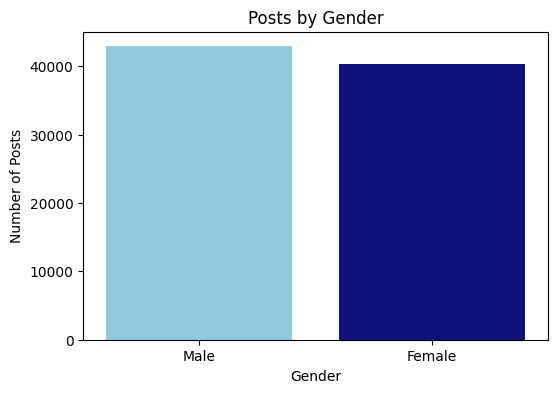

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical summary
total_posts = len(cleaned_gender_filtered)
num_female_posts = cleaned_gender_filtered['female'].sum()
num_male_posts = total_posts - num_female_posts

print(f"Total number of posts: {total_posts}")
print(f"Number of posts by females: {num_female_posts}")
print(f"Number of posts by males: {num_male_posts}")

# Visual representation
gender_counts = cleaned_gender_filtered['female'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, palette=['skyblue', 'darkblue'], y=gender_counts.values)
plt.title('Posts by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Number of Posts')
plt.show()


In [ ]:
from collections import Counter

# Split data by gender
female_posts = cleaned_gender_filtered[cleaned_gender_filtered['female'] == 1]['cleaned_post']
male_posts = cleaned_gender_df[cleaned_gender_df['female'] == 0]['cleaned_post']

# Flatten the list of words
female_words = [word for post in female_posts for word in post.split()]
male_words = [word for post in male_posts for word in post.split()]

# Count words
female_word_counts = Counter(female_words)
male_word_counts = Counter(male_words)

# Get most common words
most_common_female = female_word_counts.most_common(10)
most_common_male = male_word_counts.most_common(10)

# Print most common words
print("Most common words among female posts:", most_common_female)
print("Most common words among male posts:", most_common_male)


Most common words among female posts: [('like', 342084), ('think', 212597), ('people', 194766), ('know', 190245), ('time', 185837), ('want', 176416), ('good', 163956), ('go', 157859), ('get', 157143), ('thing', 145508)]
Most common words among male posts: [('like', 355540), ('people', 220720), ('think', 212506), ('time', 191712), ('good', 190962), ('know', 181218), ('get', 173414), ('want', 166121), ('go', 166029), ('thing', 150150)]


In [ ]:
# Add a column for post length
cleaned_gender_filtered['post_length'] = cleaned_gender_filtered['cleaned_post'].apply(len)

# Plotting
sns.boxplot(x='female', y='post_length', data=cleaned_gender_filtered)
plt.title('Average Post Length by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Post Length')
plt.show()


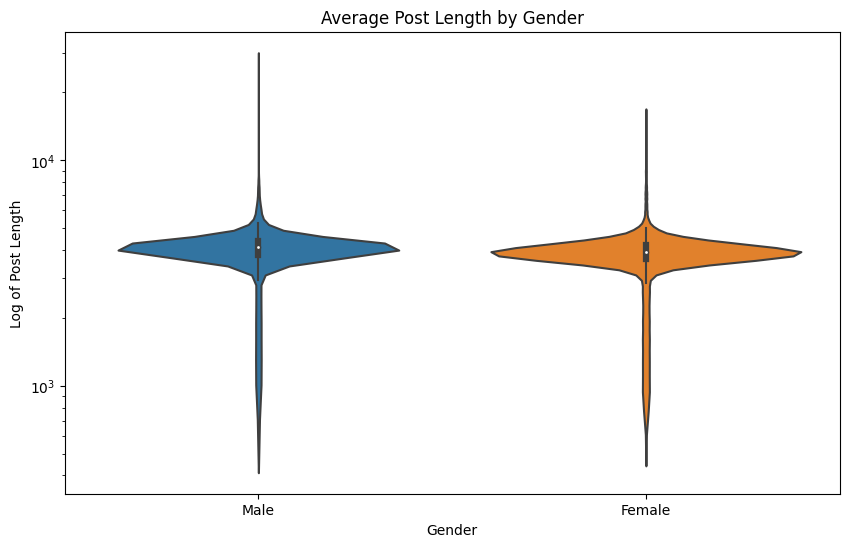

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column for post length
cleaned_gender_filtered['post_length'] = cleaned_gender_filtered['cleaned_post'].apply(len)

# Plotting with a violin plot and logarithmic scale
plt.figure(figsize=(10, 6))  # Increase plot size
sns.violinplot(x='female', y='post_length', data=cleaned_gender_filtered)
plt.yscale('log')  # Apply logarithmic scale
plt.title('Average Post Length by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Log of Post Length')
plt.show()


In [ ]:
# Count posts by nationality
nationality_counts = cleaned_nationality_df['nationality'].value_counts()

# Plotting
plt.subplot(1, 2, 2)
sns.barplot(x=nationality_counts.index, y=nationality_counts.values)
plt.title('Posts by Nationality')
plt.xticks(rotation=60)
plt.show()


In [ ]:
# Define the number of top nationalities to display
top_n = 10

# Calculate post counts for each nationality
nationality_counts = cleaned_nationality_df['nationality'].value_counts()

# Filter for top N nationalities
top_nationalities = nationality_counts.head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index)
plt.title(f'Top {top_n} Nationalities in Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Nationality')
plt.show()


In [ ]:
# Add a column for post length
cleaned_gender_df['post_length'] = cleaned_gender_df['post'].apply(len)
cleaned_nationality_df['post_length'] = cleaned_nationality_df['post'].apply(len)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='post_length', data=cleaned_gender_df)
plt.title('Average Post Length by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(x='nationality', y='post_length', data=cleaned_nationality_df)
plt.title('Average Post Length by Nationality')
plt.xticks(rotation=45)
plt.show()


Logistic Regression model voor gender

In [ ]:
# Feature extraction using TF-IDF
# You can adjust the number of features and other parameters to improve your models performance
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))

In [ ]:
# Apply TF-IDF to the cleaned posts
X = tfidf_vectorizer.fit_transform(cleaned_gender_filtered['cleaned_post'])
y = cleaned_gender_filtered['female']

In [ ]:
# Splitting the data into training and testing sets
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Initialize and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_gender, y_train_gender)

LogisticRegression()

In [ ]:
# Predictions
y_pred_gender = lr_model.predict(X_test_gender)

In [ ]:
# Getting predicted probabilities
y_pred_prob_gender = lr_model.predict_proba(X_test_gender)

In [ ]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test_gender, y_pred_gender)}')
print(classification_report(y_test_gender, y_pred_gender, digits=4))

Accuracy: 0.868987493987494
              precision    recall  f1-score   support

           0     0.8605    0.8903    0.8752      8578
           1     0.8787    0.8463    0.8622      8054

    accuracy                         0.8690     16632
   macro avg     0.8696    0.8683    0.8687     16632
weighted avg     0.8693    0.8690    0.8689     16632



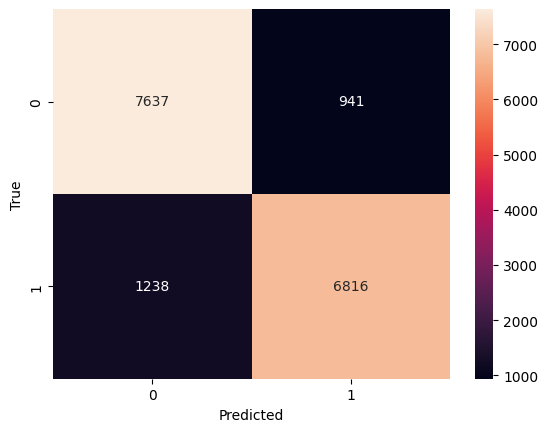

In [ ]:

cm = confusion_matrix(y_test_gender, y_pred_gender)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


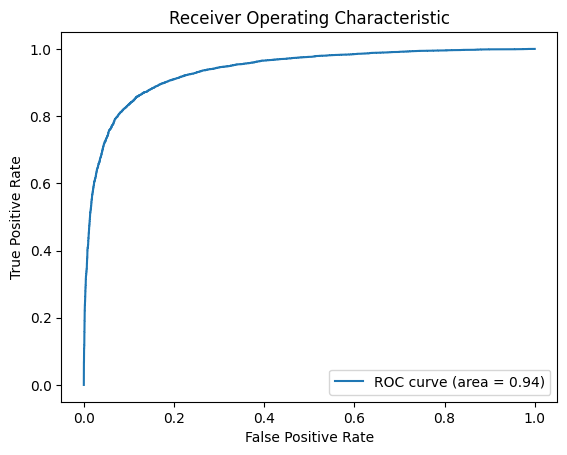

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])  # y_pred_prob is the probability of the positive class
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)


Cross-validated scores: [0.82208995 0.83994709 0.81661857 0.81702844 0.8236426 ]


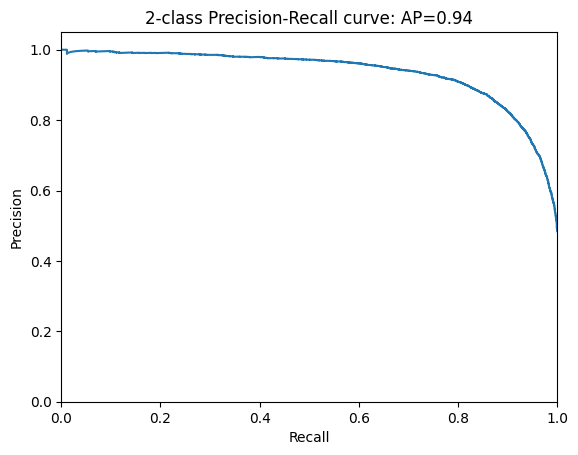

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1])
average_precision = average_precision_score(y_test, y_pred_prob[:, 1])

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
plt.show()


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importances = lr_model.coef_[0]
sorted_features = sorted(zip(feature_importances, feature_names), reverse=True)
print("Most important features for prediction:")
for importance, feature in sorted_features[:25]:
    print(f'{feature}: {importance}')

Most important features for prediction:
husband: 10.880642002163995
boyfriend: 6.282505838389301
date guy: 6.187151232940491
omg: 5.657014277668419
lesbian: 5.152368765812296
baby: 4.995810330256247
bf: 4.462155232606152
okay: 4.215921275385756
hubby: 4.155843144821185
stamp: 4.15210811292186
gross: 3.9310375482604663
bra: 3.8184749621402814
period: 3.805635242992091
super: 3.7878659326271444
romance: 3.7659140963423425
makeup: 3.7292183463383877
toddler: 3.713333142986767
edit add: 3.658141473586265
female: 3.63901012627986
absolutely: 3.5362821117180743
emote: 3.484972221759067
definitely: 3.449272973019005
mom: 3.4376167886593567
cute: 3.4087501118338377
yay: 3.4036375038090467


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importances = lr_model.coef_[0]

# For the male class, we are interested in the most negative coefficients
# as they are more indicative of the '0' class in binary classification
sorted_features_for_male = sorted(zip(feature_importances, feature_names))
print("Most important features for prediction of male class:")
for importance, feature in sorted_features_for_male[:25]:  # Top 20 features
    print(f'{feature}: {importance}')


Most important features for prediction of male class:
wife: -10.8241291528462
gay: -6.393131227161072
bro: -5.667963352425617
gf: -4.693433702952979
problem: -4.247272993261046
nice: -3.9167934093615524
ex wife: -3.8879683066609947
simple: -3.884623639307463
buddy: -3.713725380145851
gay man: -3.5772230954696376
beer: -3.569150640920493
engineer: -3.412591810211396
date woman: -3.403046725111506
guitar: -3.3138052757640857
probably: -3.3034829586318226
album: -3.1742524658702447
father: -3.1650148806320653
fantastic: -3.159552869746163
guess: -3.1347150479896913
girlfriend: -3.107424255641105
pussy: -3.062101626701987
female friend: -2.9500191976845502
power: -2.896438150253083
game: -2.8709219082054296
argument: -2.8298890407518598


-----------------------------------
naive bayes

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
mnb_model = MultinomialNB()

In [ ]:
# Train the model
mnb_model.fit(X_train_gender, y_train_gender)

MultinomialNB()

In [ ]:
# Get feature names, assuming you have a vectorizer like CountVectorizer or TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
# Get log probabilities
log_prob = mnb_model.feature_log_prob_

In [ ]:
# Exponentiate to get actual probabilities
prob = np.exp(log_prob)

In [ ]:
# For each class, print the top N words
top_n = 50
for i, class_prob in enumerate(prob):
    top_features = class_prob.argsort()[-top_n:][::-1]
    gender = 'Female' if i == 1 else 'Male'
    print(f"Top {top_n} words for {gender}:")
    print([feature_names[j] for j in top_features])

Top 50 words for Male:
['like', 'people', 'think', 'good', 'time', 'know', 'want', 'thing', 'work', 'year', 'look', 'need', 'way', 'game', 'say', 'gt', 'feel', 'try', 'man', 'day', 'guy', 'play', 'right', 'come', 'woman', 'love', 'lot', 'life', 'tell', 'mean', 'bad', 'lol', 'use', 'start', 'friend', 'url', 'fuck', 'point', 'shit', 'date', 'make', 'sure', 'kid', 'yeah', 'long', 'ask', 'probably', 'actually', 'talk', 'great']
Top 50 words for Female:
['like', 'think', 'people', 'know', 'time', 'want', 'feel', 'good', 'thing', 'work', 'year', 'need', 'love', 'look', 'try', 'kid', 'say', 'day', 'woman', 'way', 'tell', 'thank', 'friend', 'lot', 'life', 'help', 'lol', 'man', 'relationship', 'child', 'date', 'come', 'right', 'ask', 'husband', 'start', 'person', 'family', 'talk', 'live', 'make', 'bad', 'parent', 'guy', 'mean', 'old', 'dog', 'sure', 'long', 'week']


In [ ]:
# Predictions
y_pred_mnb_gender = mnb_model.predict(X_test_gender)

In [ ]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test_gender, y_pred_mnb_gender)}')
print(classification_report(y_test_gender, y_pred_mnb_gender, digits=4))


Accuracy: 0.7822871572871573
              precision    recall  f1-score   support

           0     0.8002    0.7702    0.7849      8578
           1     0.7647    0.7951    0.7796      8054

    accuracy                         0.7823     16632
   macro avg     0.7824    0.7827    0.7823     16632
weighted avg     0.7830    0.7823    0.7823     16632



Baseline Model

In [ ]:

# For Gender Prediction
dummy_clf_gender = DummyClassifier(strategy="most_frequent")

dummy_clf_gender.fit(X_train_gender, y_train_gender)

gender_pred = dummy_clf_gender.predict(X_test_gender)

accuracy_gender = accuracy_score(y_test_gender, gender_pred)

# For Nationality Prediction
#dummy_clf_nationality = DummyClassifier(strategy="most_frequent")
#dummy_clf_nationality.fit(X_train, y_train_nationality)  # nog invullen
#nationality_pred = dummy_clf_nationality.predict(X_test)
#accuracy_nationality = accuracy_score(y_test_nationality, nationality_pred)  # nog invullen

print(f"Dummy Classifier (Majority Baseline) Accuracy for Gender: {accuracy_gender}")
#print(f"Dummy Classifier (Majority Baseline) Accuracy for Nationality: {accuracy_nationality}")


Dummy Classifier (Majority Baseline) Accuracy for Gender: 0.5157527657527657
